In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#random forest
from sklearn.ensemble import RandomForestClassifier
#xgboost
from xgboost import XGBClassifier

In [10]:
np.random.seed(42)
n_records = 500

data = {
    'Age': np.random.randint(21, 65, n_records),
    'Income': np.random.randint(20000, 160000, n_records), # In $k
    'Experience': np.random.randint(0, 41, n_records),
    'Family': np.random.randint(1, 5, n_records),
    'Credit_Score': np.random.randint(300, 850, n_records),
    'Education': np.random.randint(1, 4, n_records), # 1: Undergrad, 2: Grad, 3: Advanced
    'Mortgage': np.random.choice([0, 50, 100, 200], n_records, p=[0.7, 0.1, 0.1, 0.1])
    # 'Loan Status': 
}

data = pd.DataFrame(data)
data

,Age,Income,Experience,Family,Credit_Score,Education,Mortgage
0,59,40358,8,3,603,2,0
1,49,23267,9,1,368,3,0
2,35,102745,25,1,660,1,0
3,63,109588,40,3,519,2,200
4,28,58513,34,3,460,3,0
...,...,...,...,...,...,...,...
495,46,39256,33,3,319,3,200
496,30,120158,33,3,572,2,200
497,46,139719,28,4,418,1,0
498,54,88244,3,2,815,3,200


In [11]:
score = (data['Credit_Score'] / 850) * 0.5 + (data['Income'] / 160) * 0.4 + (data['Experience'] / 40) * 0.1
data['Loan_Approved'] = (score > 0.5).astype(int)
data.head(10)

,Age,Income,Experience,Family,Credit_Score,Education,Mortgage,Loan_Approved
0,59,40358,8,3,603,2,0,1
1,49,23267,9,1,368,3,0,1
2,35,102745,25,1,660,1,0,1
3,63,109588,40,3,519,2,200,1
4,28,58513,34,3,460,3,0,1
5,41,31338,24,3,388,2,0,1
6,59,151484,25,1,458,2,100,1
7,39,27543,10,1,788,2,0,1
8,43,125891,37,3,623,2,0,1
9,31,80692,1,4,680,3,0,1


In [23]:
v = np.random.randint(0, 500, 100)
data.loc[v, 'Loan_Approved'] = 1 - data.loc[v, 'Loan_Approved']
data.head(10)

,Age,Income,Experience,Family,Credit_Score,Education,Mortgage,Loan_Approved
0,59,40358,8,3,603,2,0,1
1,49,23267,9,1,368,3,0,1
2,35,102745,25,1,660,1,0,0
3,63,109588,40,3,519,2,200,1
4,28,58513,34,3,460,3,0,1
5,41,31338,24,3,388,2,0,0
6,59,151484,25,1,458,2,100,1
7,39,27543,10,1,788,2,0,0
8,43,125891,37,3,623,2,0,1
9,31,80692,1,4,680,3,0,0


In [13]:
x = data.drop("Loan_Approved", axis=1)
y = data["Loan_Approved"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
model = RandomForestClassifier(n_estimators=100, max_depth=4, min_samples_split=5, min_samples_leaf=2, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.83


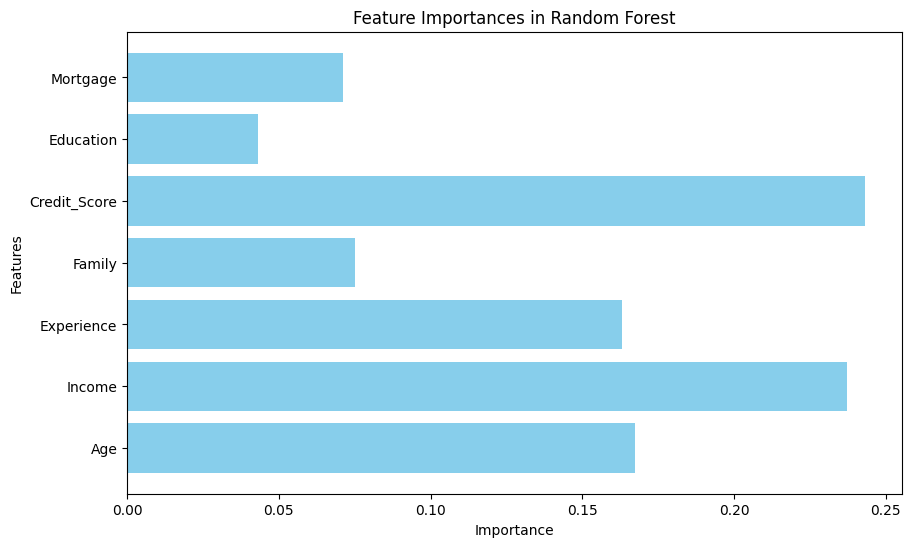

In [22]:
plt.figure(figsize=(10, 6))
feature_importances = model.feature_importances_
features = x.columns
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances in Random Forest')
plt.show()

In [42]:
new_cust = pd.DataFrame({
    'Age': [30],
    'Income': [60000],
    'Experience': [5],
    'Family': [2],
    'Credit_Score': [700],
    'Education': [2],
    'Mortgage': [0]
})
new_cust_pred = model.predict(new_cust)
# print("New Customer Loan Approval Prediction (0: Not Approved, 1: Approved) = ", new_cust_pred[0])
new_cust_pred

array([1])

In [44]:
xgb = XGBClassifier(n_estimators=150, max_depth=4, learning_rate=0.01, random_state=42)
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")

XGBoost Accuracy: 0.83
